In [1]:

using PyPlot
using OrdinaryDiffEqTsit5

In [2]:
function saturns_moons!(du, u, p, t)
    x1, y1, x2, y2 = u[1], u[2], u[3], u[4]
    vx1, vy1, vx2, vy2 = u[5], u[6], u[7], u[8]
    
    rho1 = sqrt(x1^2 + y1^2)
    rho2 = sqrt(x2^2 + y2^2)
    rho12 = sqrt((x1-x2)^2+(y1-y2)^2)
    
    mu1, mu2 = p[1], p[2]
    
    ax1 = -x1/rho1^3 - (x1 - x2)/rho12^3 * mu2    
    ay1 = -y1/rho1^3 - (y1 - y2)/rho12^3 * mu2  
    ax2 = -x2/rho1^3 + (x1 - x2)/rho12^3 * mu1  
    ay2 = -y2/rho1^3 + (y1 - y2)/rho12^3 * mu1  

    du[1] = vx1
    du[2] = vy1
    du[3] = vx2
    du[4] = vy2
    du[5] = ax1
    du[6] = ay1
    du[7] = ax2
    du[8] = ay2
    
    return nothing
end

saturns_moons! (generic function with 1 method)

In [3]:

p = (0.001, 0.001)
delta = 0.01

rho1 = (1 + delta, 0)
rho2 = (-(1 - delta), 0)

v1 = (0, sqrt(1 / (1 + delta)))
v2 = (0, -sqrt(1 / (1 - delta)))

u0 = [rho1[1], rho1[2], rho2[1], rho2[2], v1[1], v1[2], v2[1], v2[2]]

tspan = (0.0, 100.0)

(0.0, 100.0)

In [4]:

prob = ODEProblem(saturns_moons!, u0, tspan, p)
sol = solve(prob, Tsit5(), reltol=1e-10, abstol=1e-10);

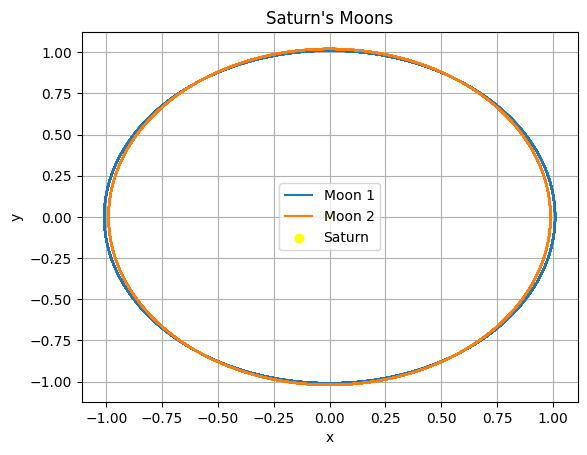

In [8]:

# Plot the trajectories
plot(sol[1, :], sol[2, :], label="Moon 1")
plot(sol[3, :], sol[4, :], label="Moon 2")
scatter([0], [0], label="Saturn", color=:yellow)
xlabel("x")
ylabel("y")
grid(true)
legend()
title("Saturn's Moons");